In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def preprocess_image(image):
    """
    Preprocess the image for lane detection.
    Steps:
        1. Convert to grayscale
        2. Apply Gaussian blur for noise reduction
        3. Apply Canny edge detection
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny


In [3]:
def region_of_interest(image):
    """
    Define the region of interest (ROI) where lane lines are expected.
    """
    height = image.shape[0]
    # You can adjust these polygon points to better fit your lane markings
    polygons = np.array([
        [(100, height), (2000, height), (550, 70)]
    ])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    plt.imshow(masked_image)
    plt.show()
    return masked_image

In [4]:
def detect_lines(canny_image):
    """
    Detect potential lane lines using Hough Transform.
    """
    lines = cv2.HoughLinesP(canny_image, rho=2, theta=np.pi/180, threshold=100,
                            minLineLength=40, maxLineGap=50)
    return lines

In [5]:
def display_lanes(image, lines):
    """
    Display the detected lane lines on the original image.
    """
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    result = cv2.addWeighted(image, 0.8, line_image, 1, 1)
    return result


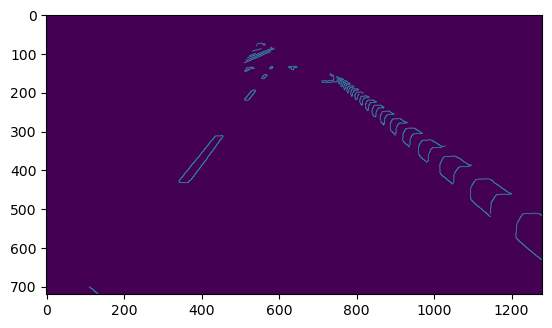

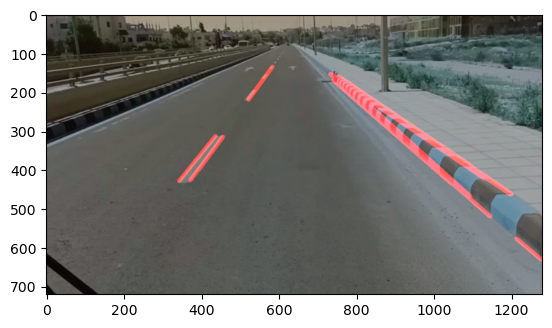

In [6]:
# Load the image
image = cv2.imread(r"C:\Users\islam\Desktop\LAST semester at GJU\Machine II\MLII Assignment 2\frame0.jpg")

# Preprocess the image
canny = preprocess_image(image)

# Define the region of interest
cropped_image = region_of_interest(canny)

# Detect potential lane lines
lines = detect_lines(cropped_image)

# Display the detected lane lines on the original image
result = display_lanes(image, lines)
"""
# Display the result (use OpenCV for better performance)
cv2.imshow("Lane Detection", result)
cv2.waitKey(0)
cv2.destroyAllWindows()
"""
plt.imshow(result)
plt.show()



Video Lane Detection

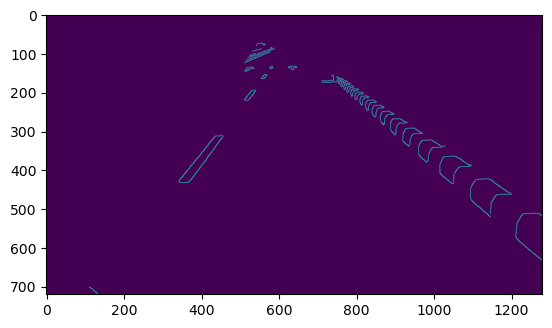

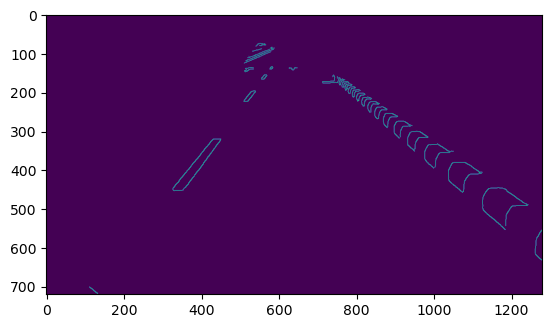

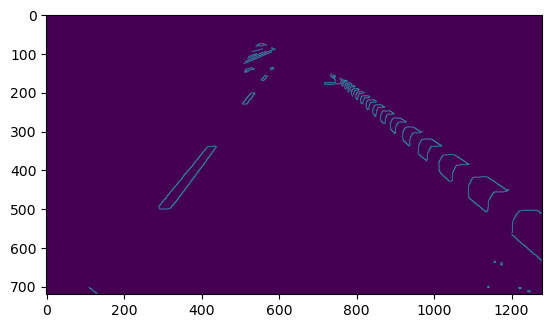

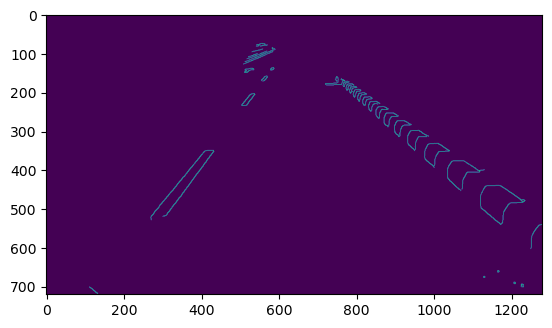

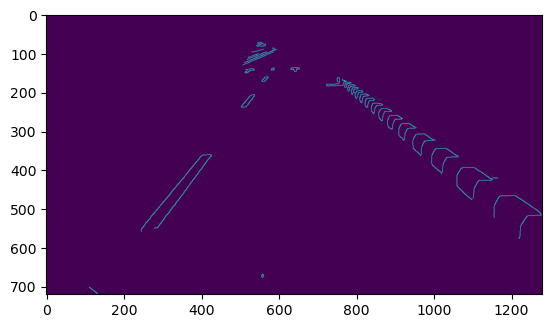

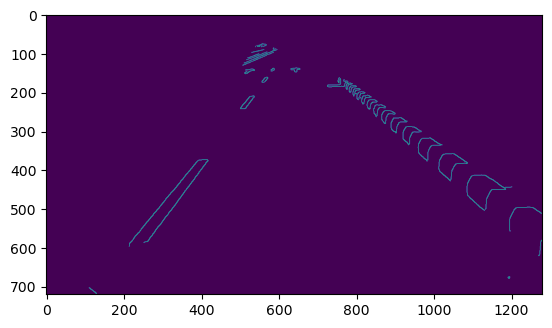

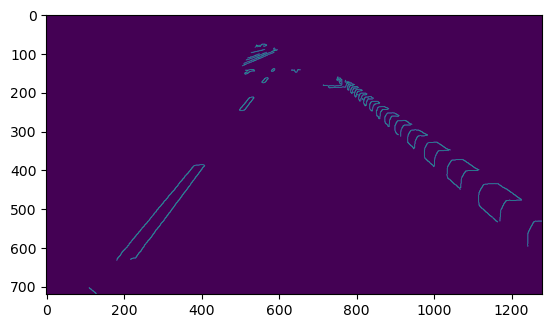

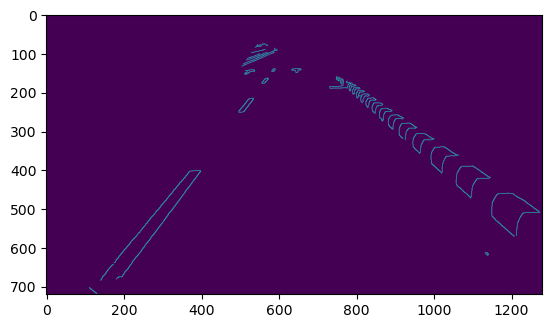

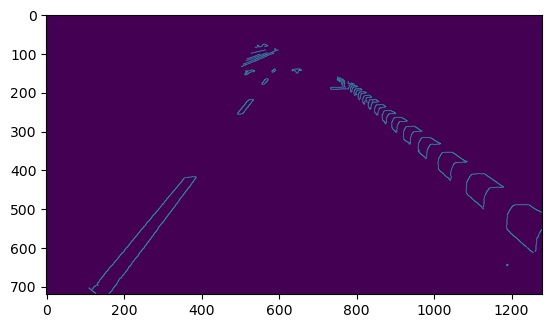

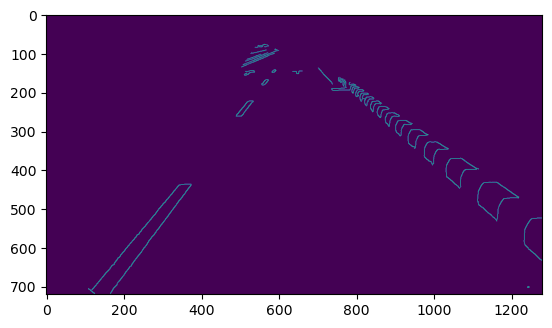

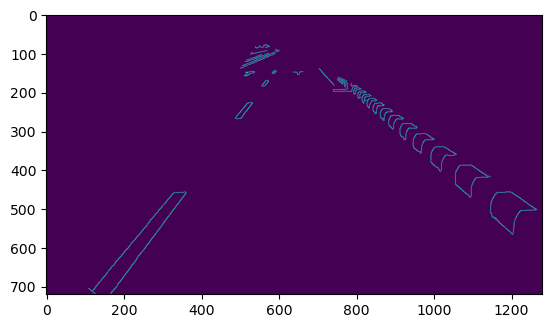

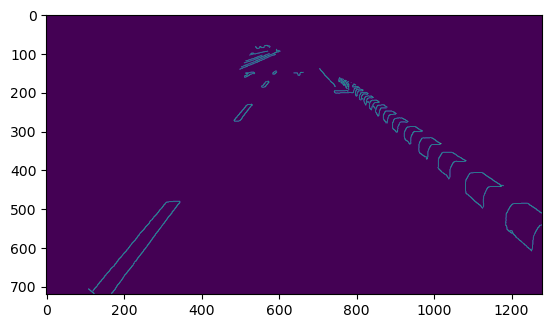

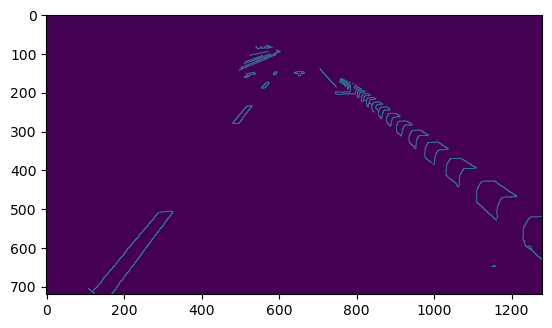

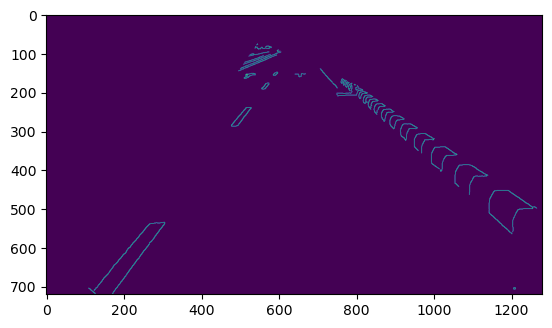

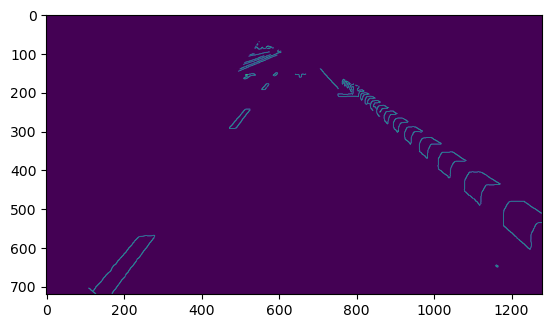

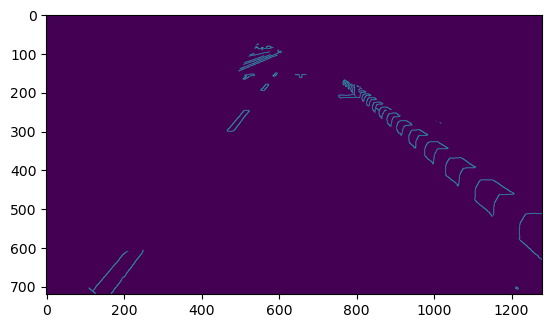

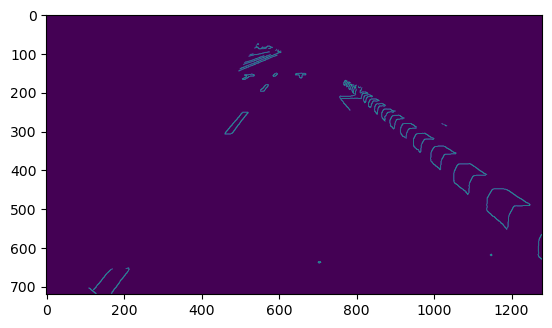

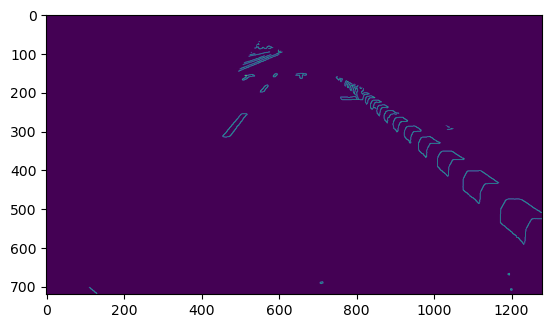

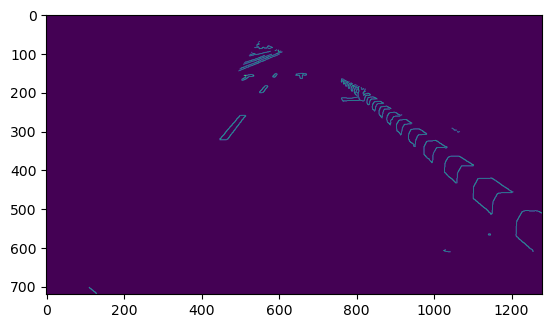

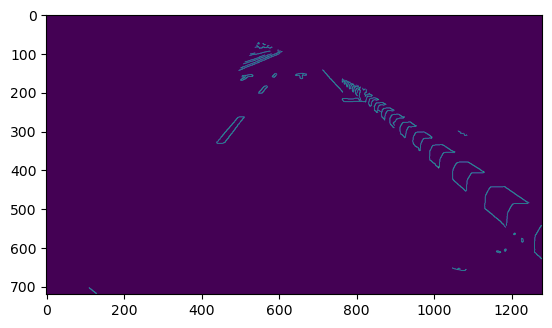

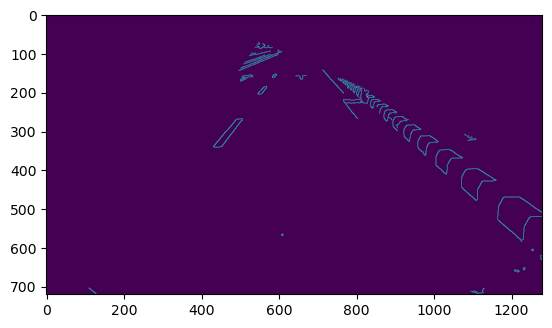

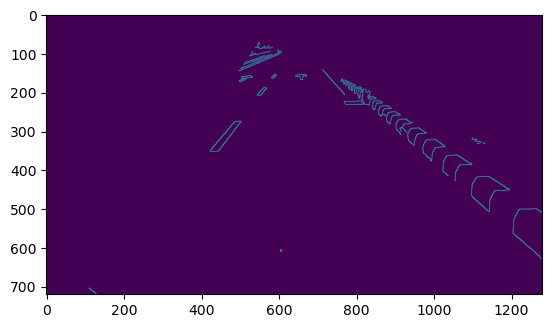

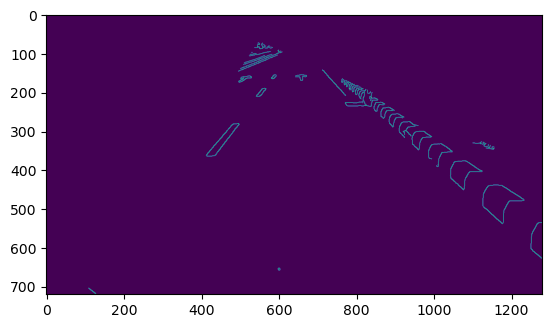

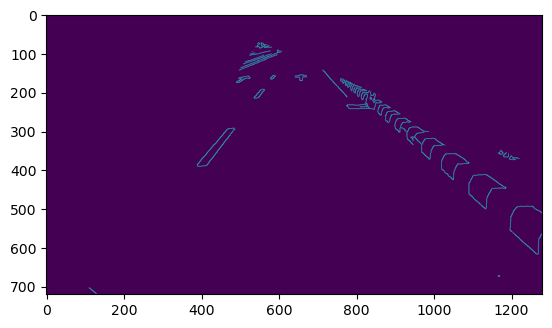

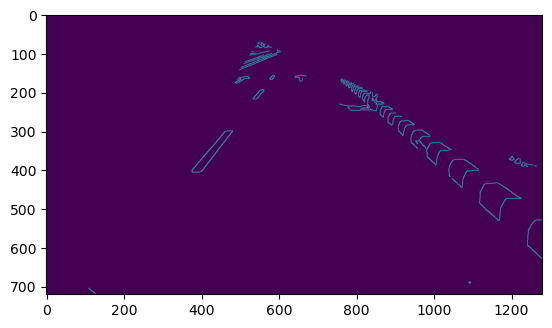

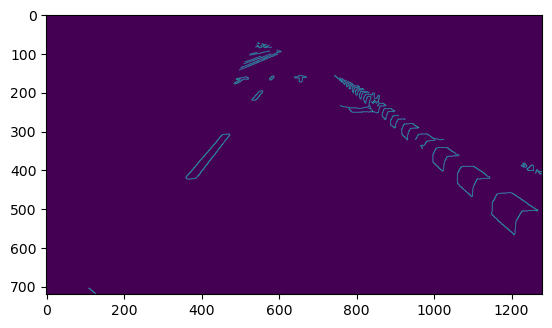

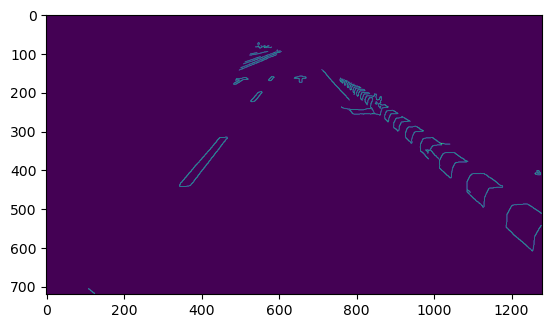

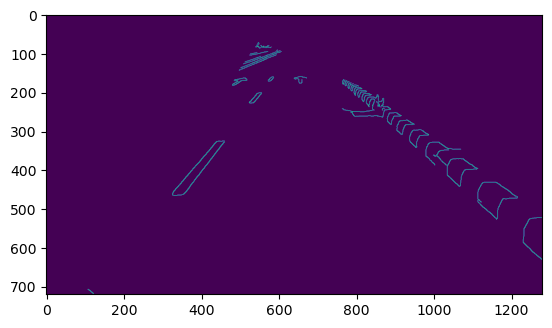

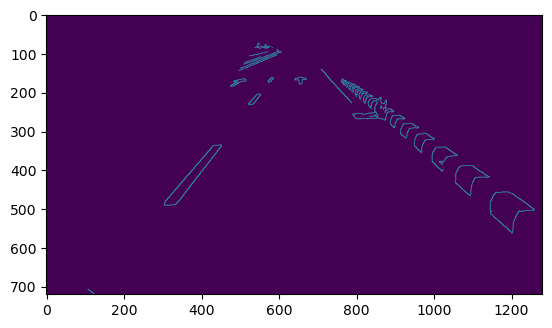

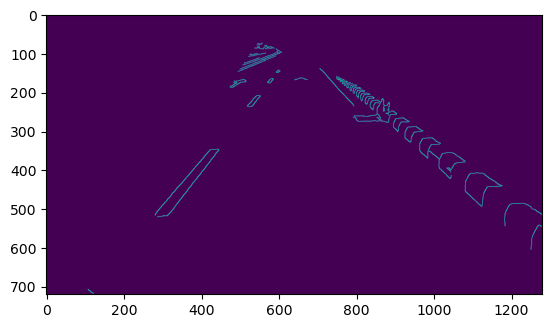

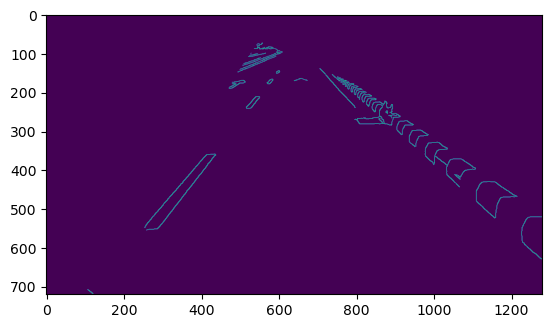

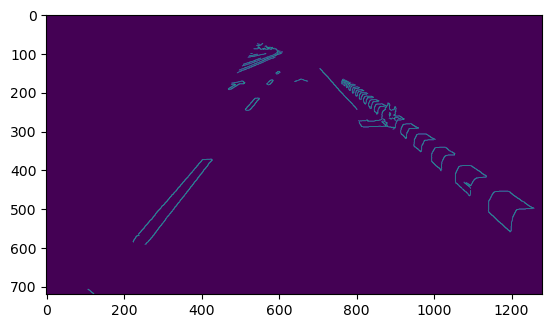

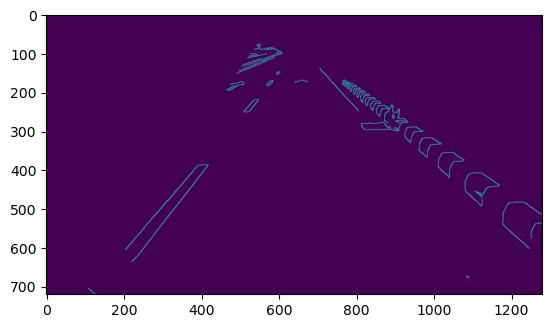

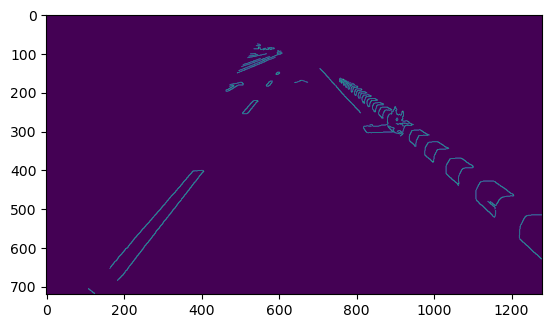

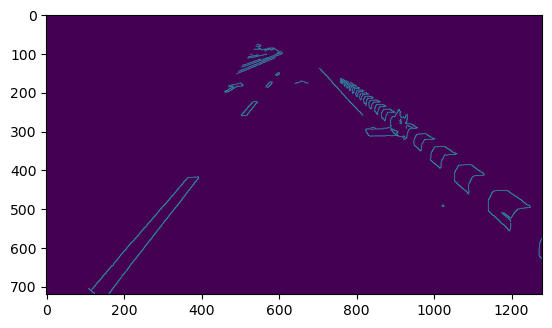

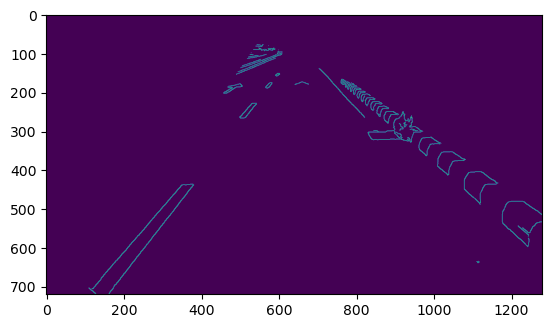

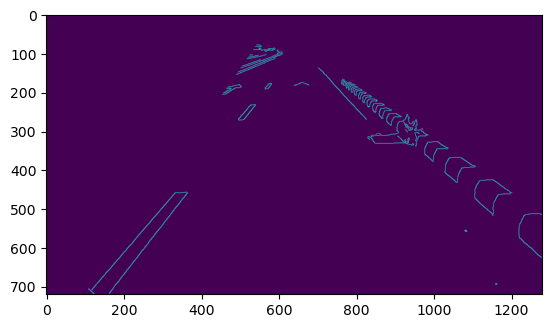

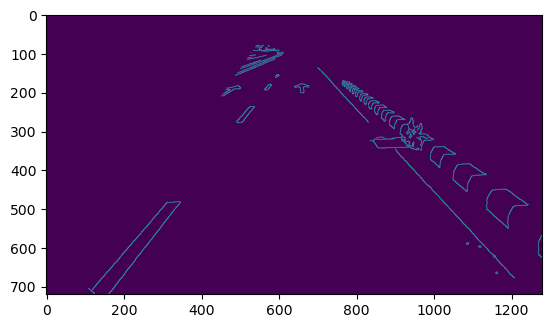

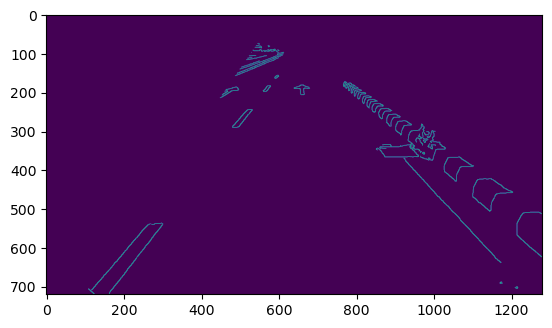

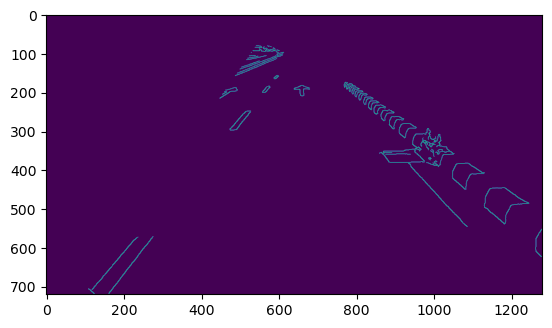

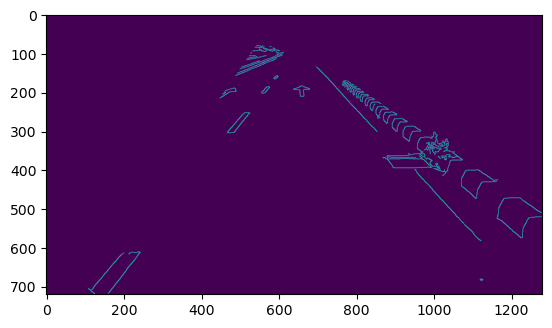

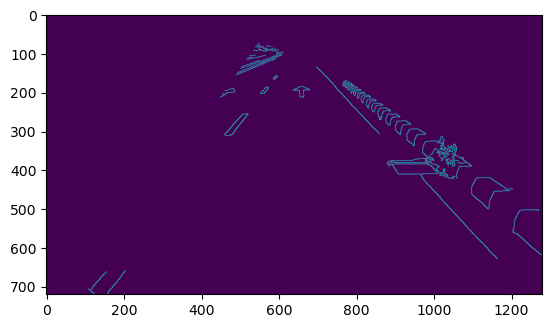

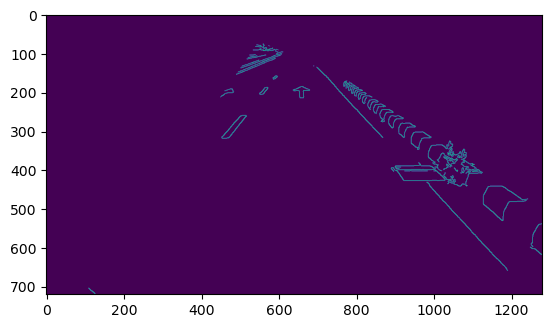

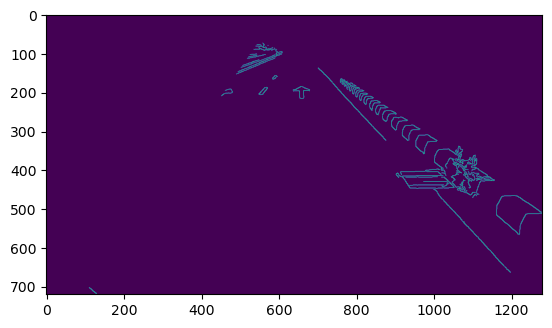

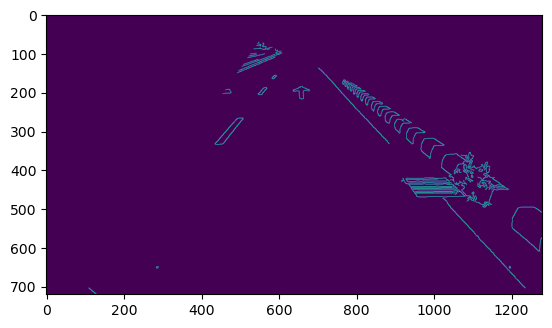

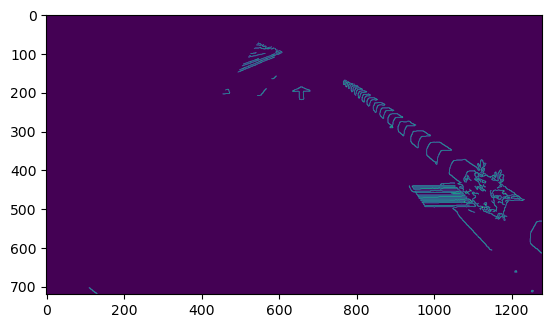

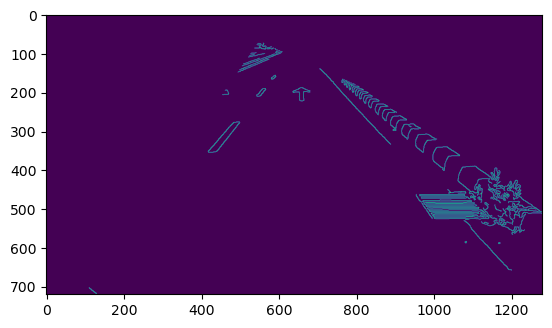

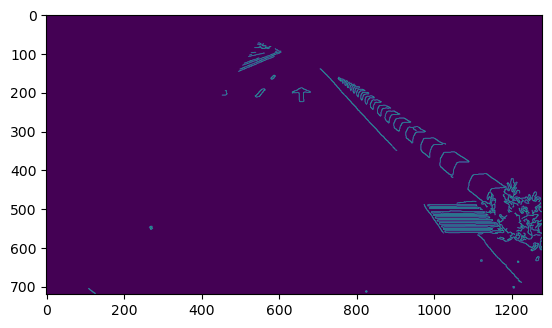

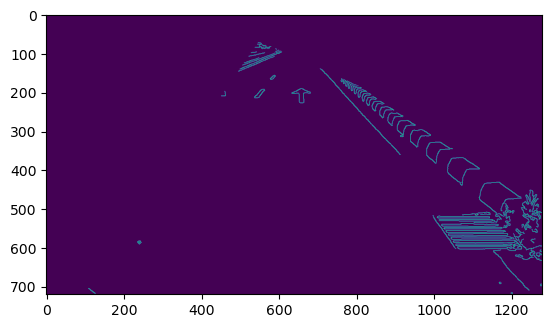

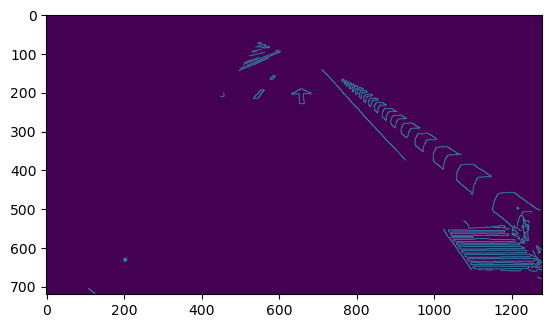

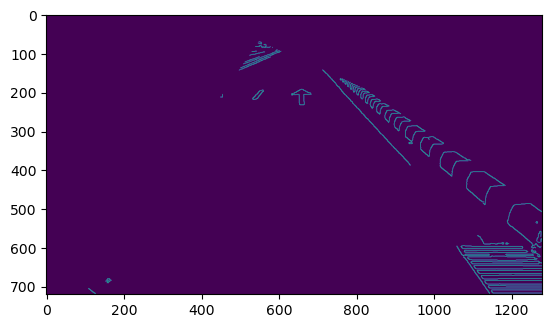

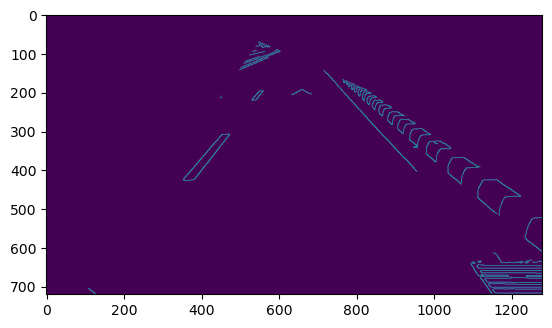

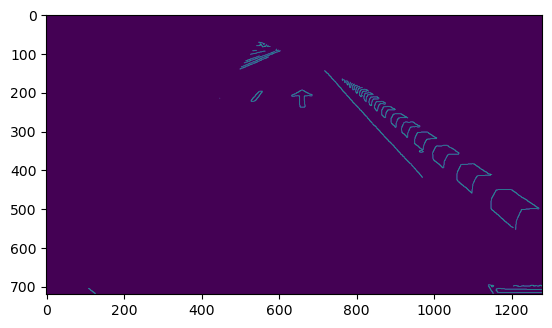

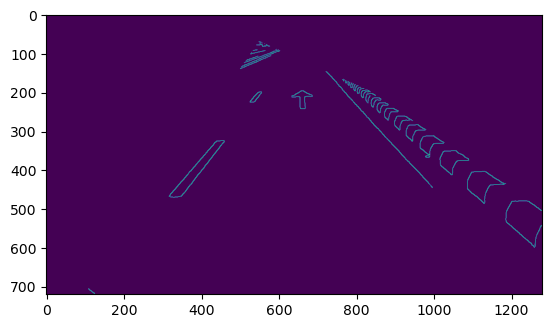

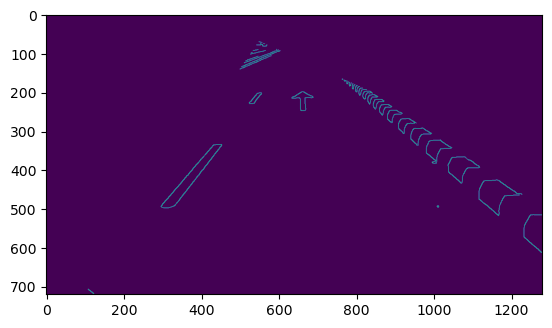

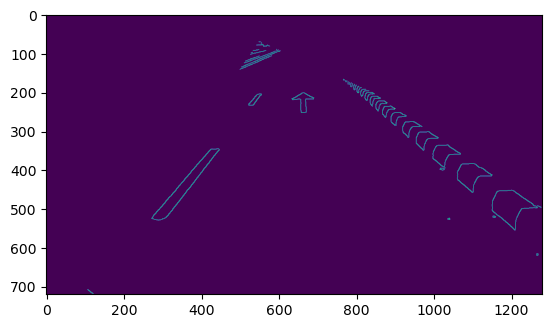

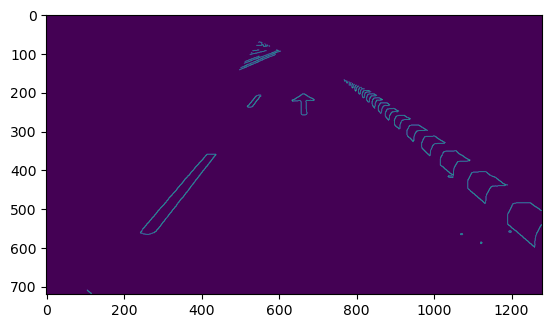

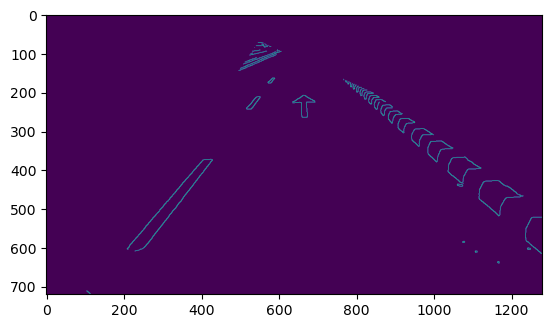

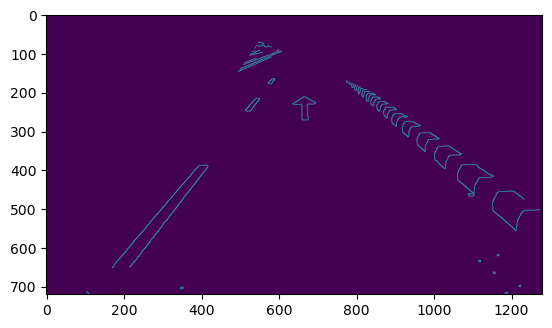

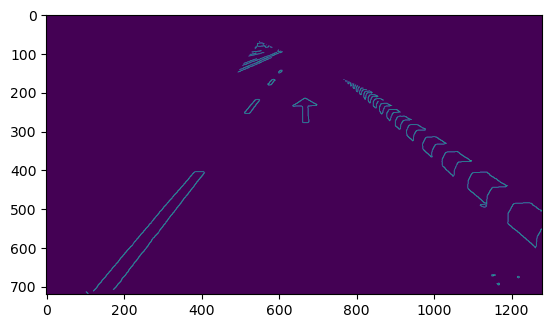

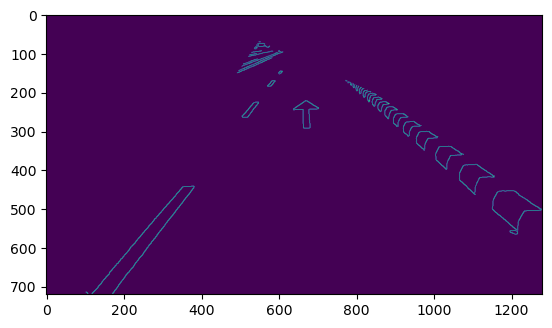

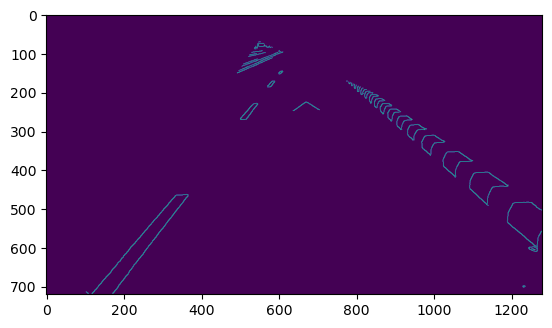

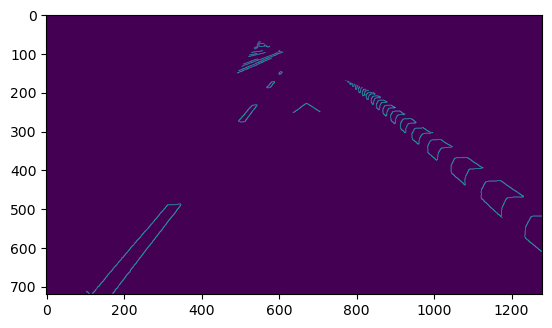

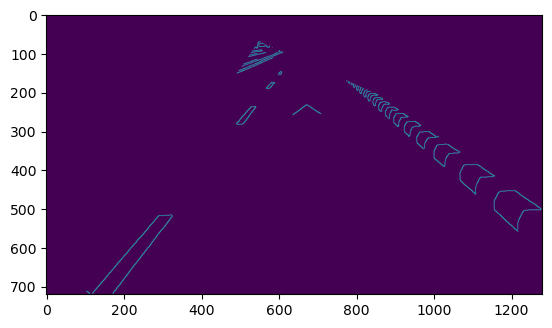

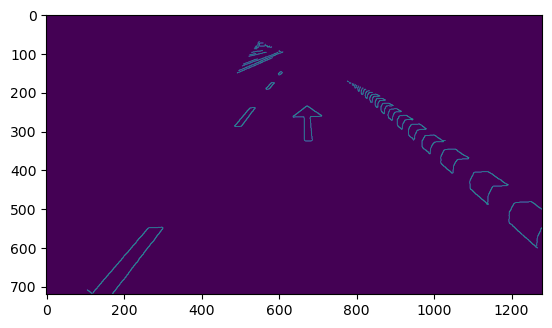

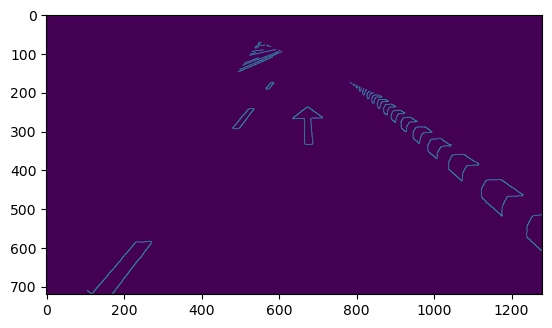

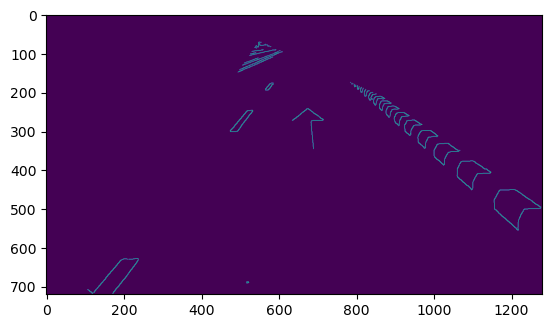

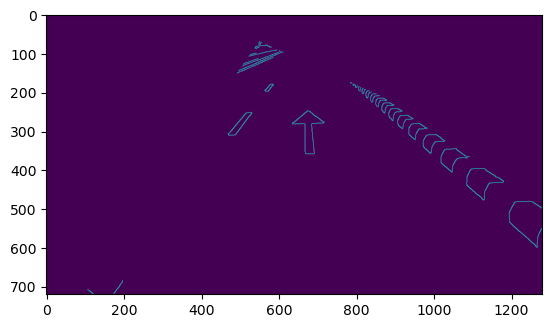

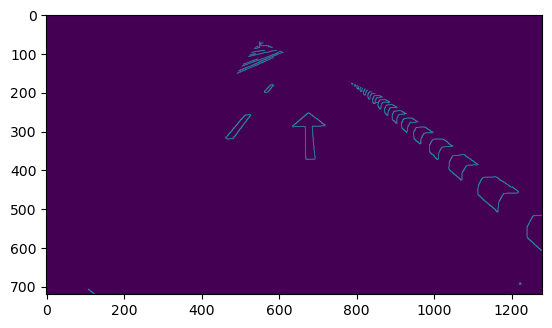

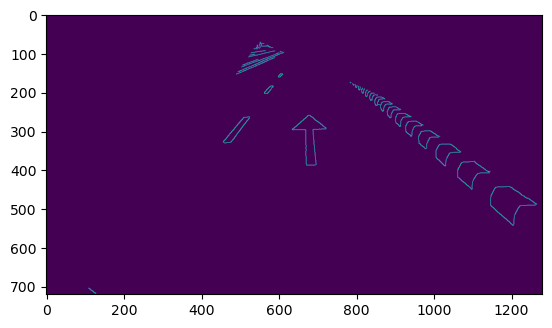

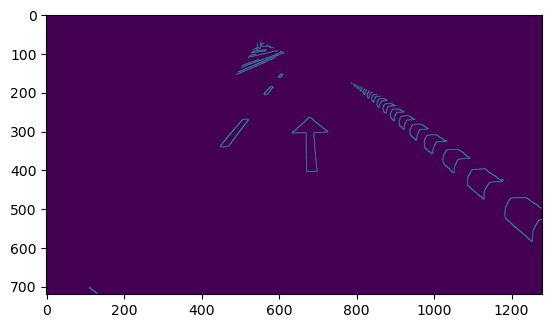

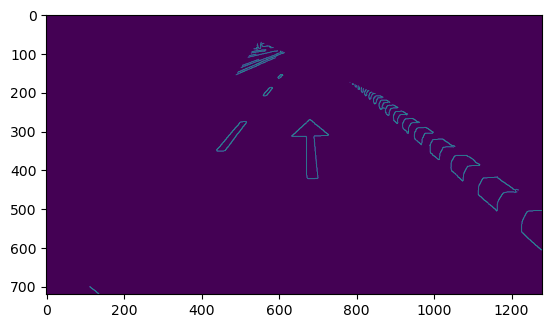

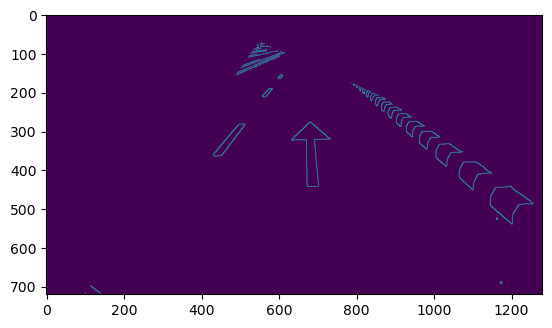

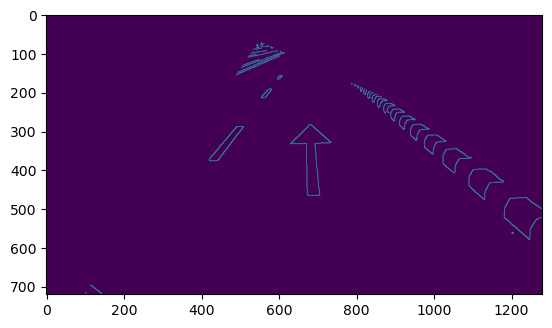

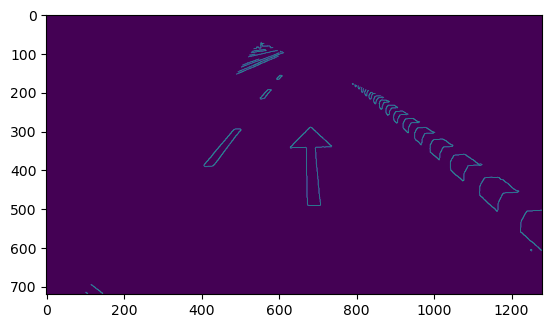

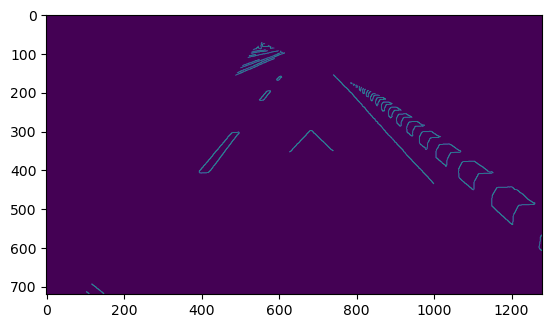

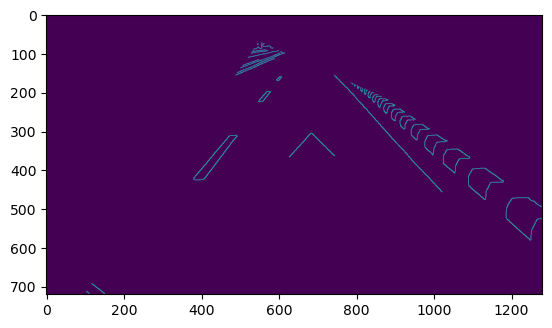

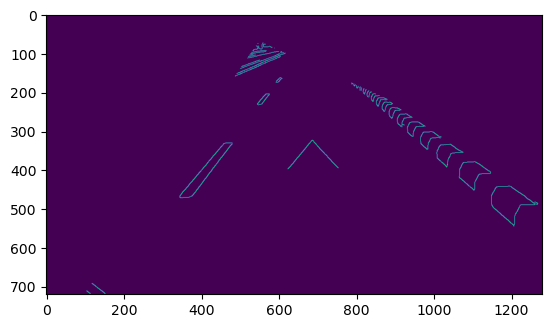

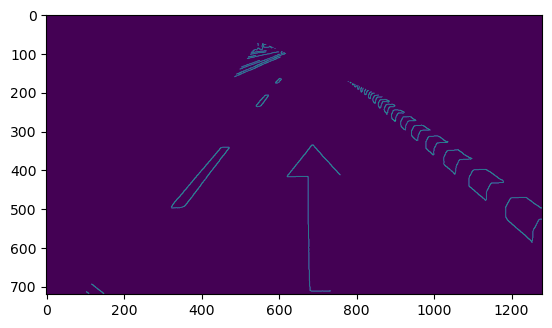

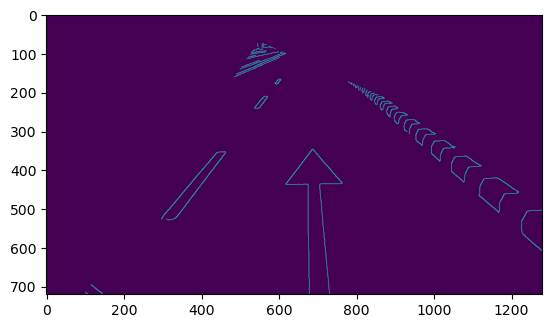

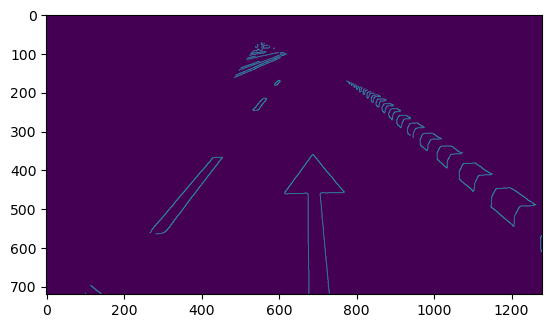

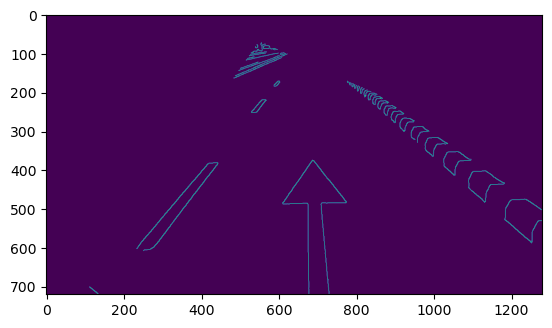

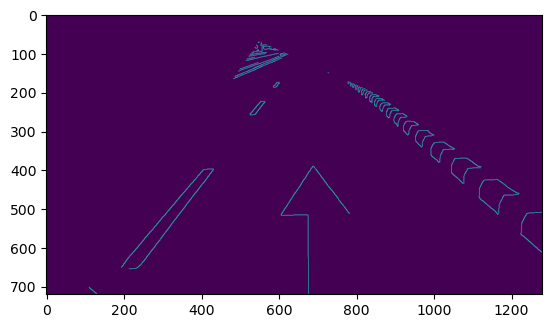

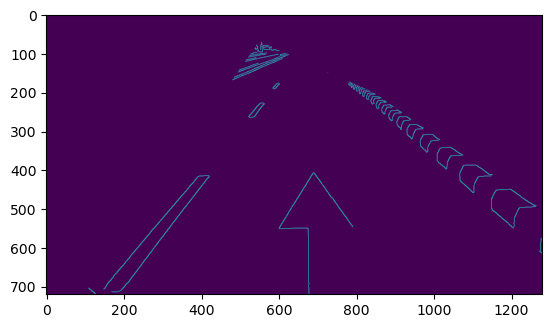

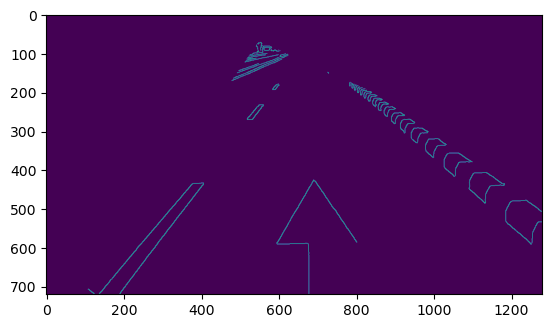

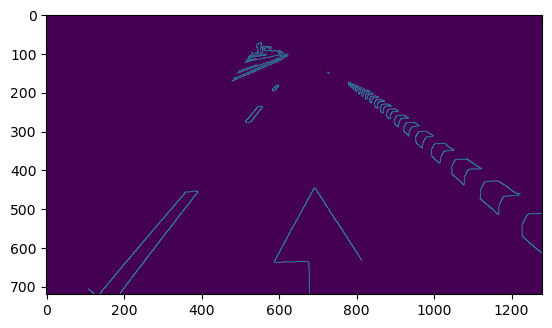

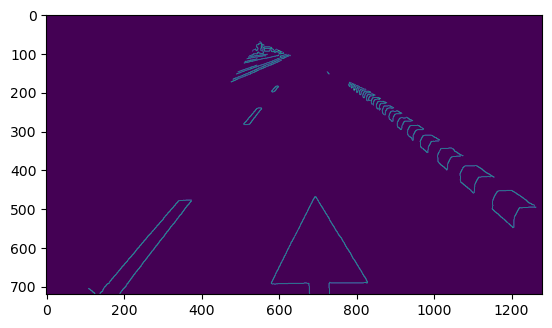

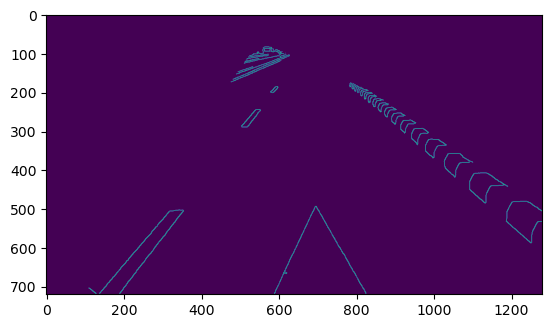

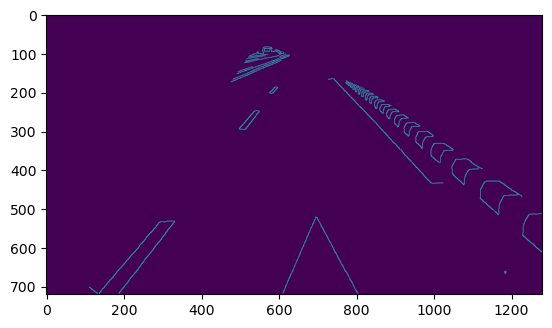

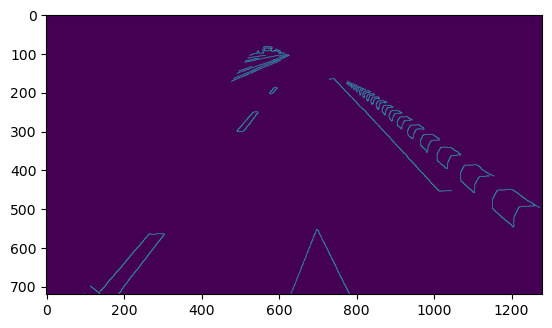

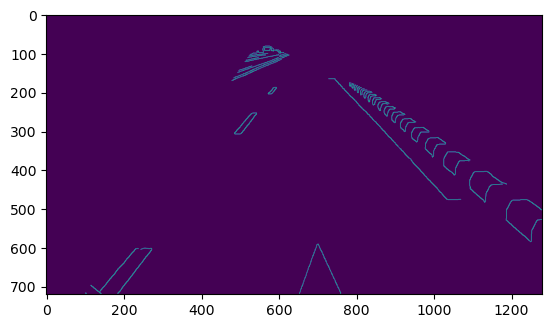

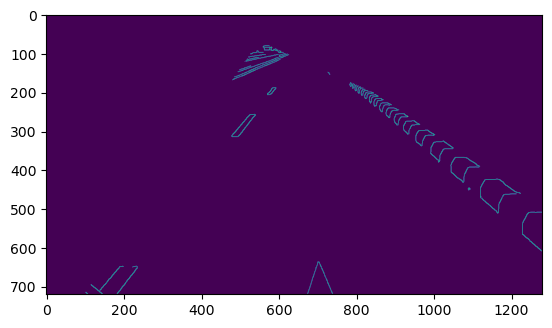

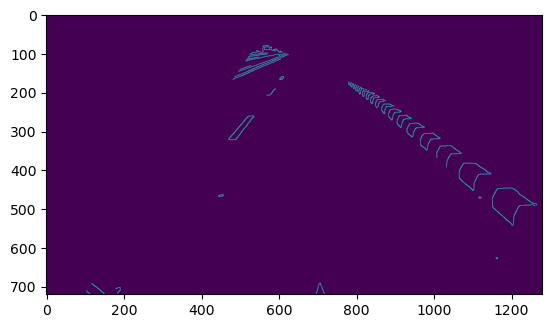

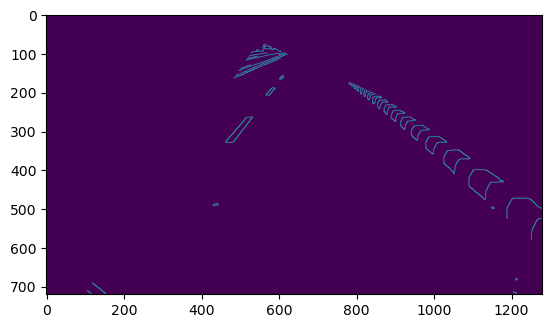

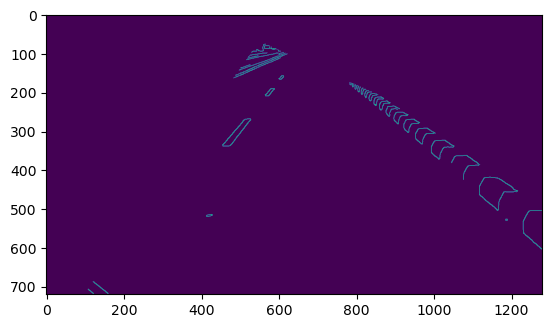

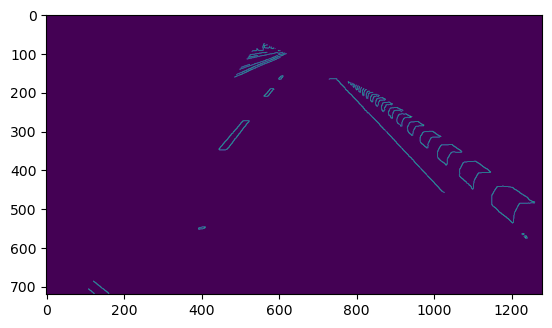

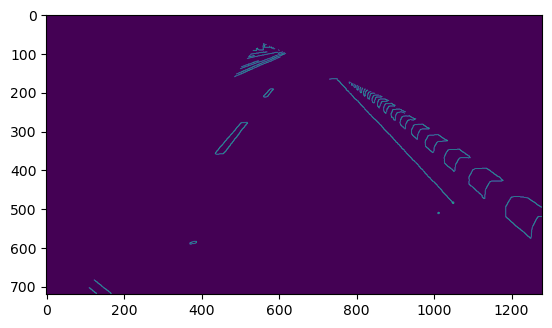

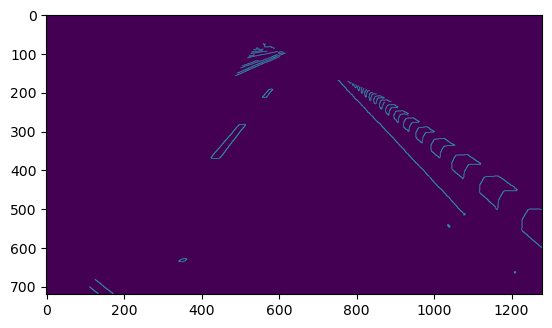

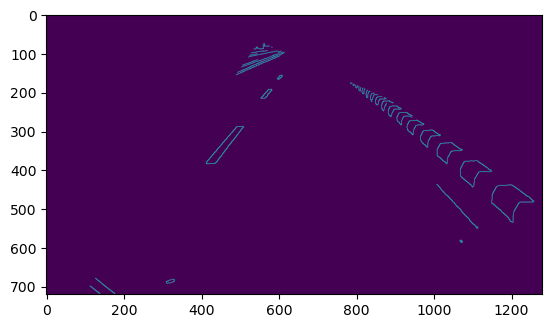

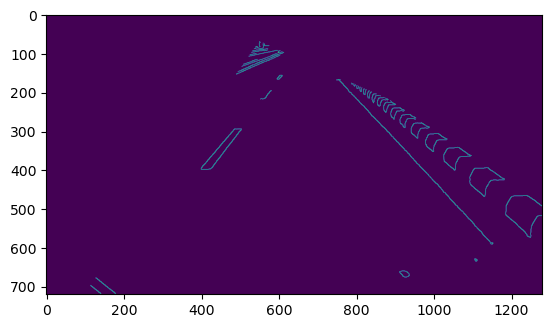

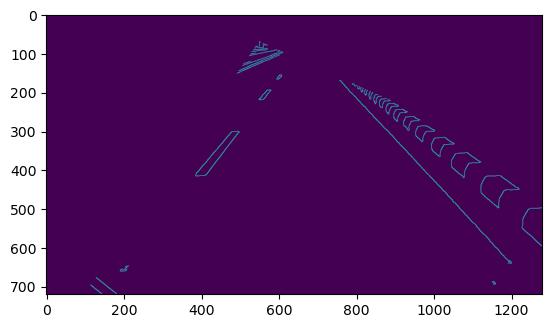

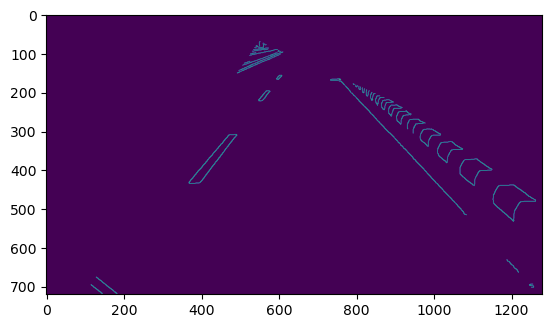

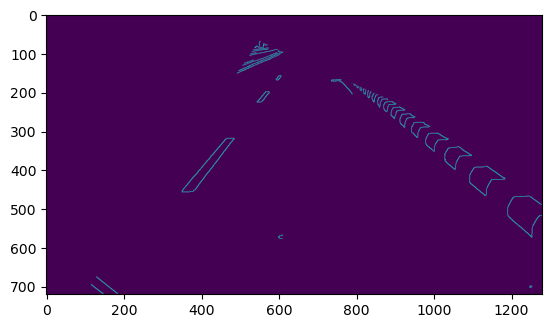

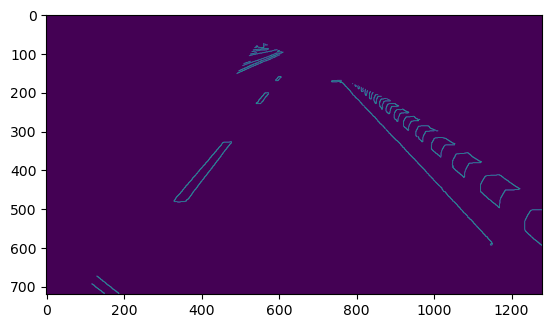

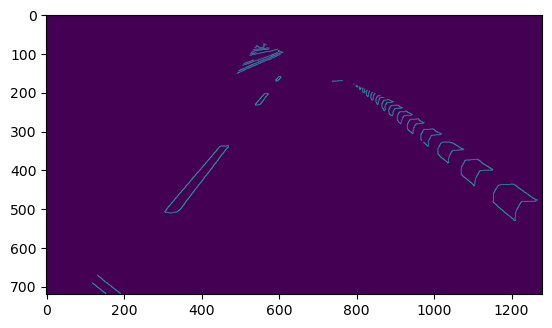

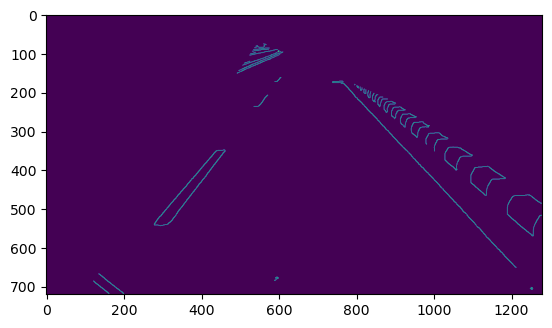

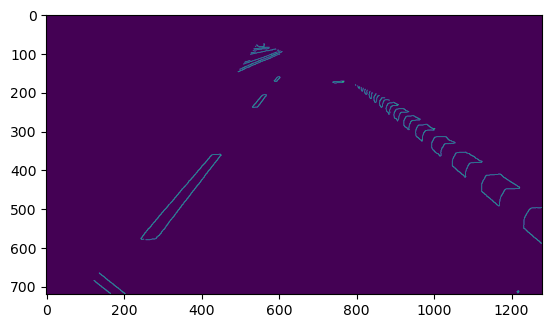

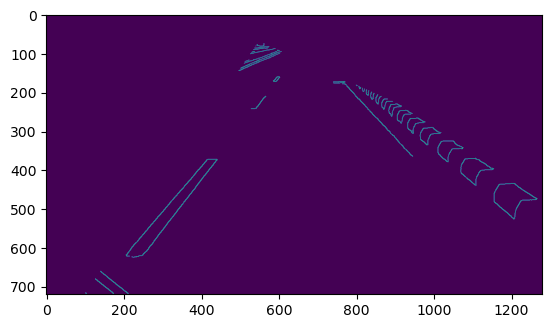

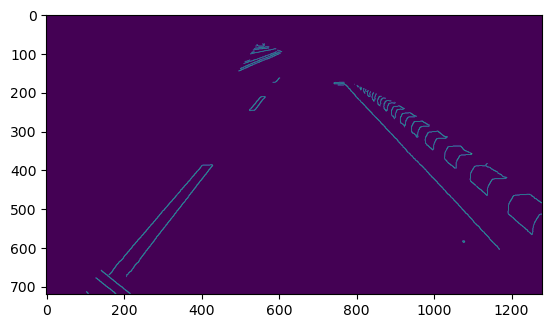

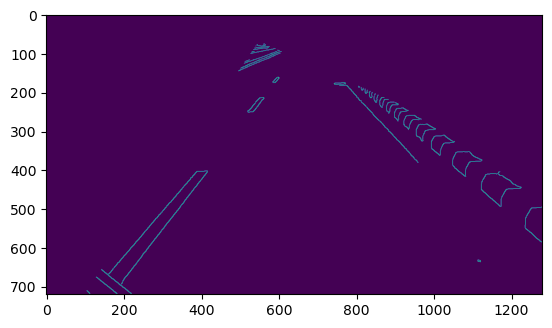

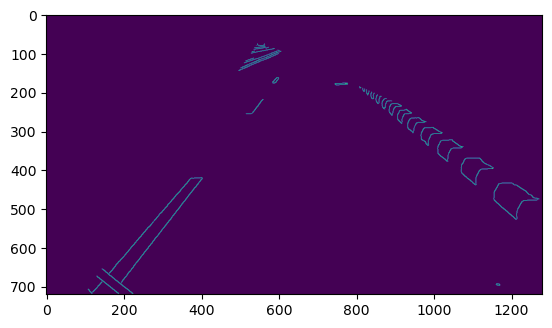

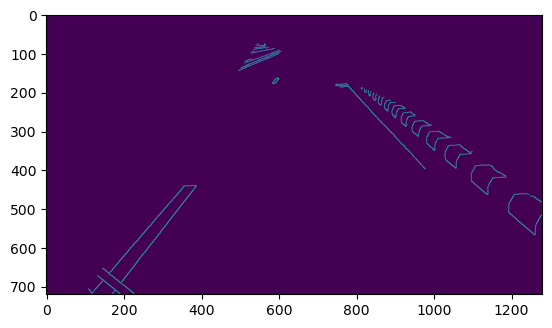

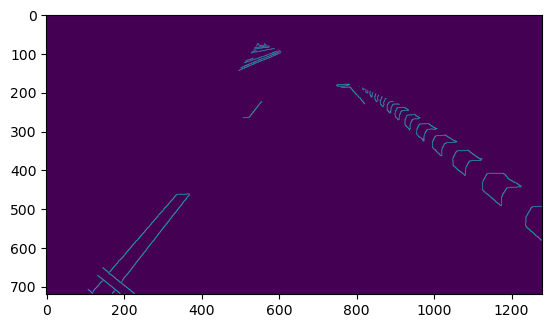

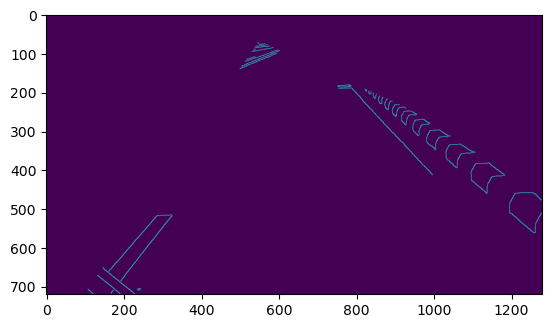

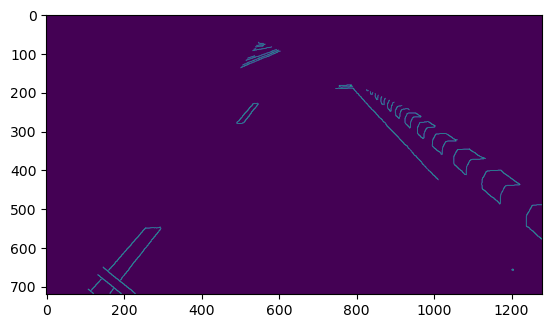

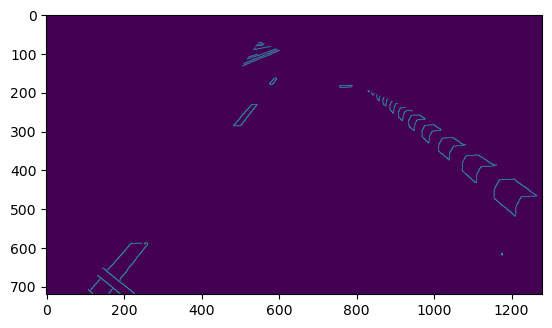

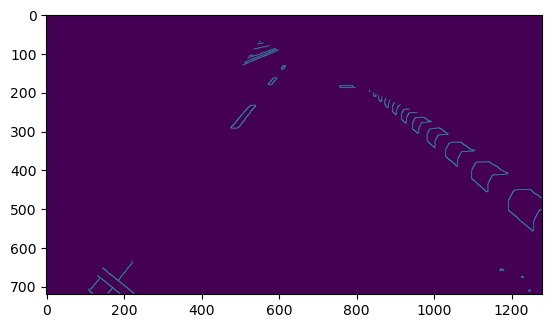

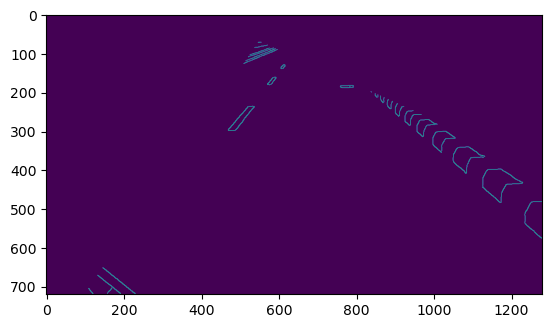

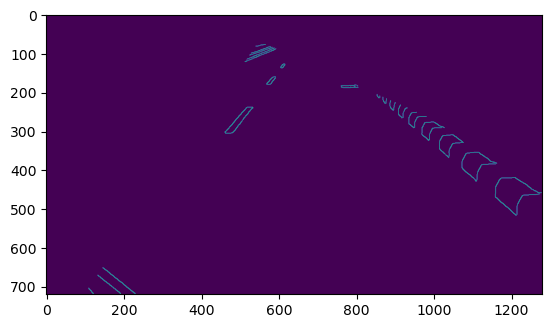

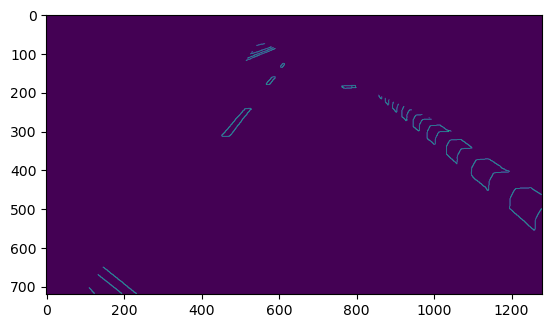

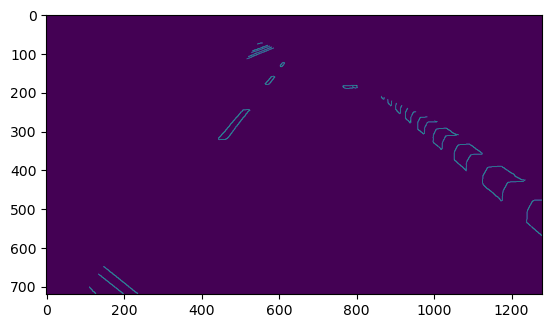

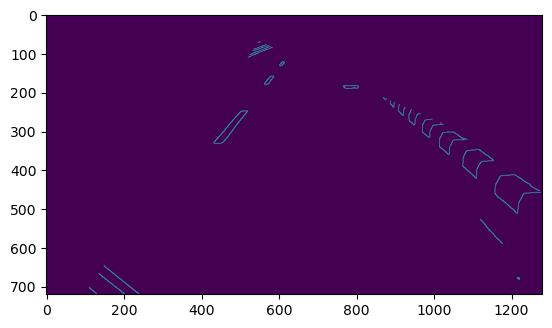

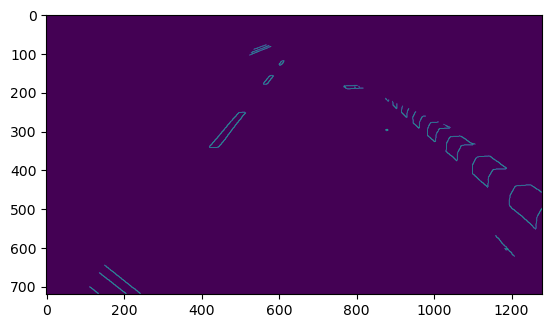

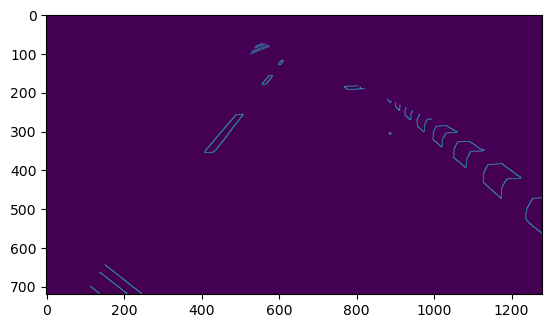

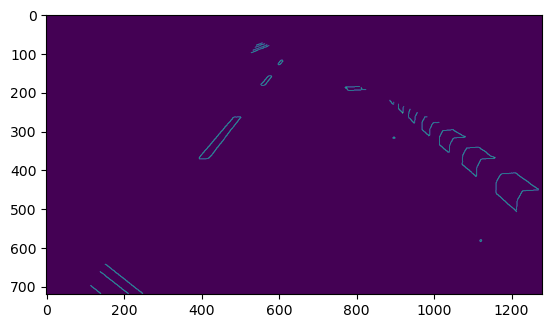

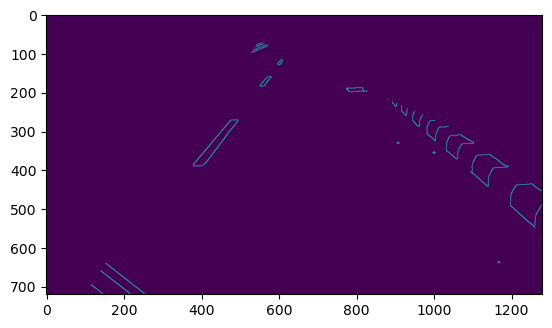

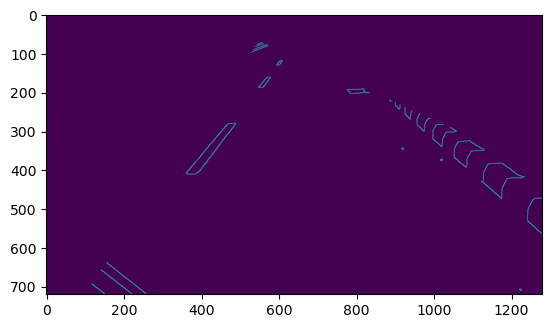

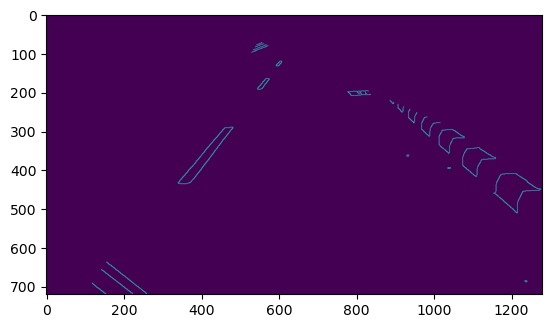

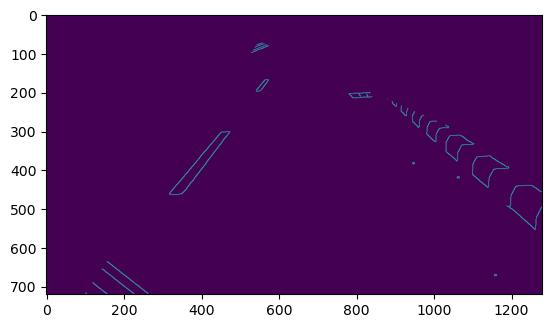

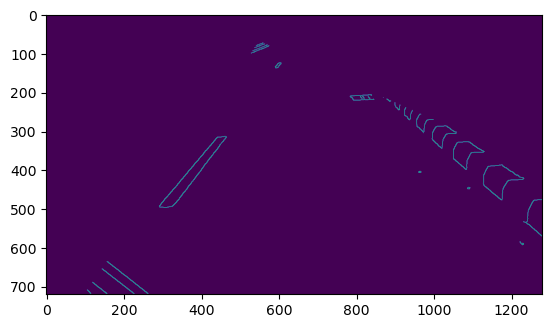

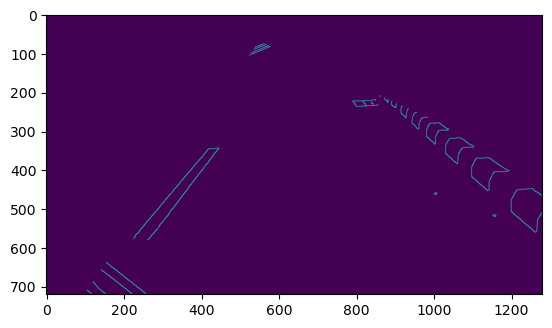

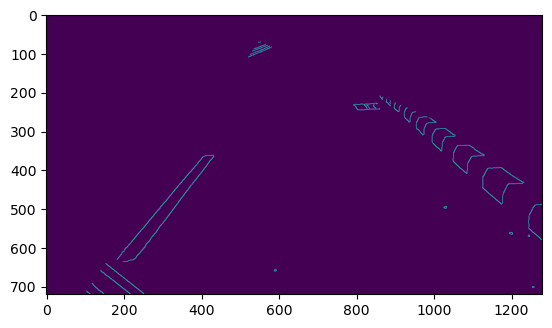

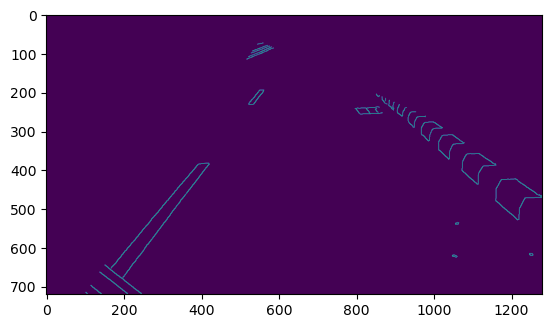

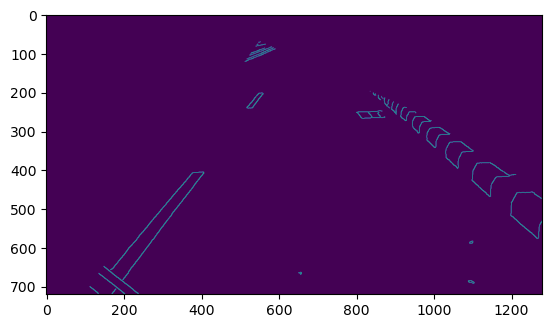

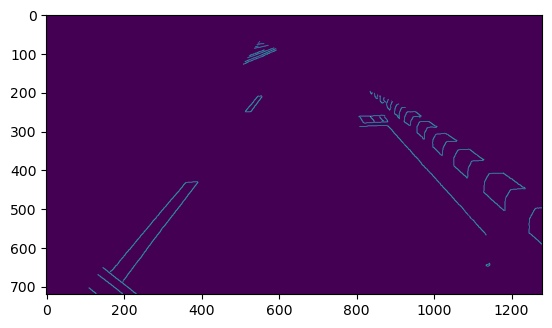

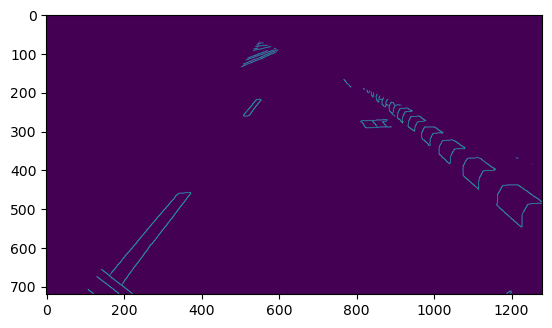

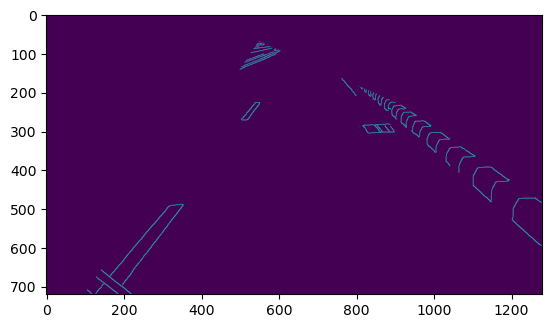

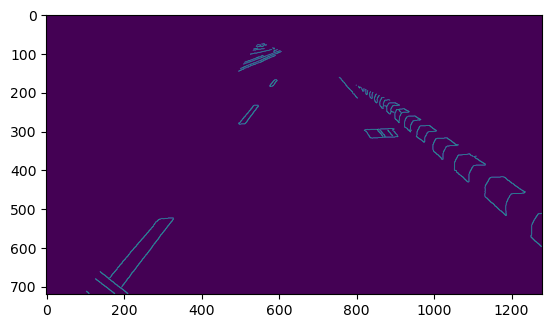

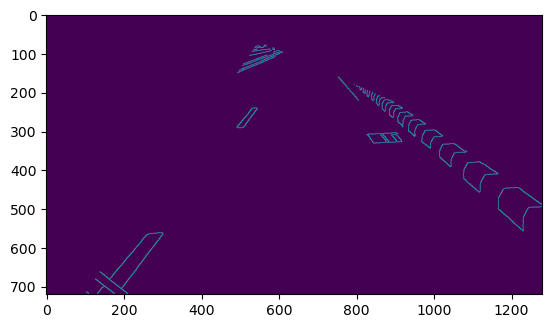

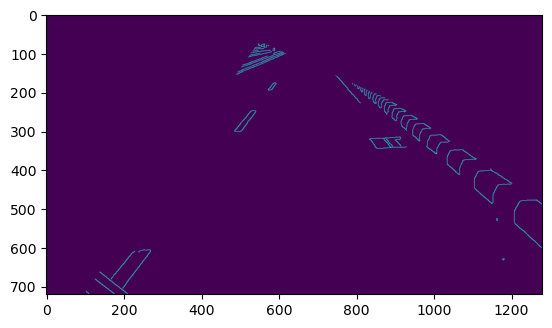

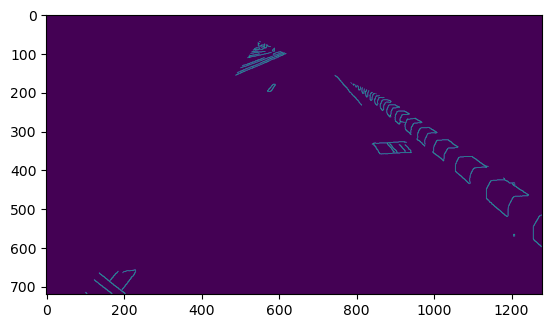

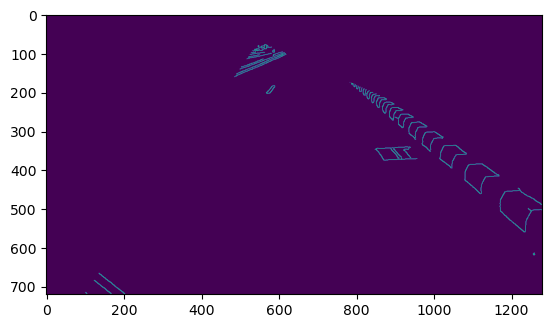

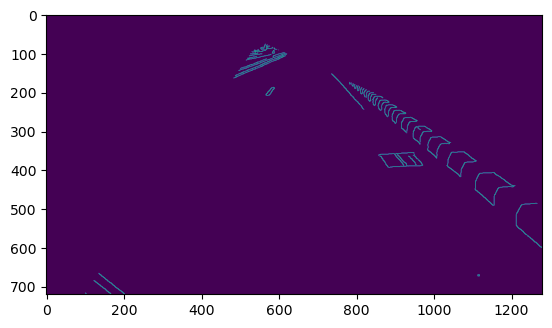

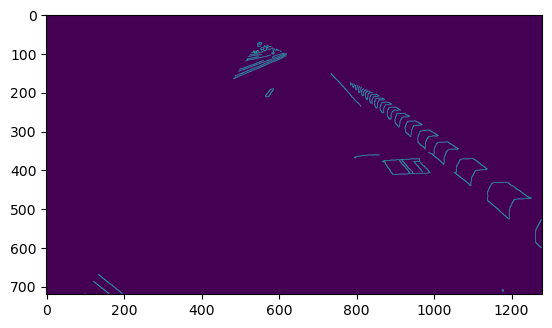

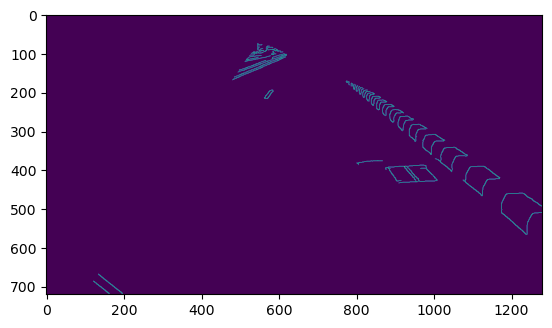

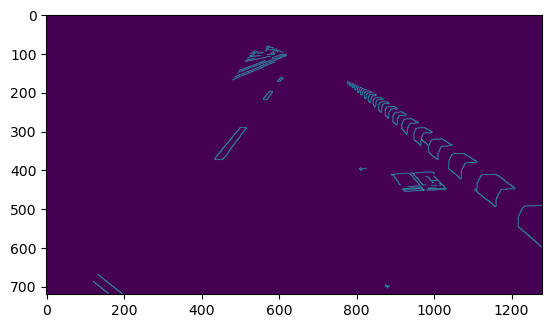

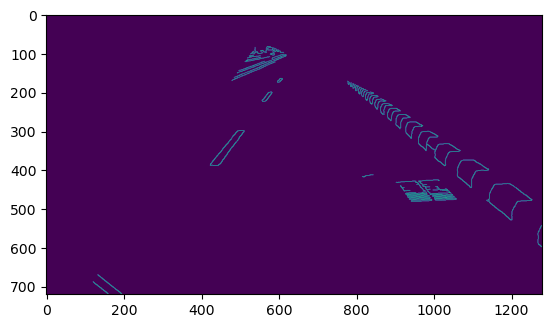

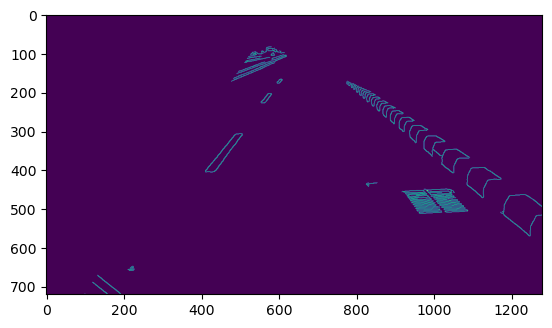

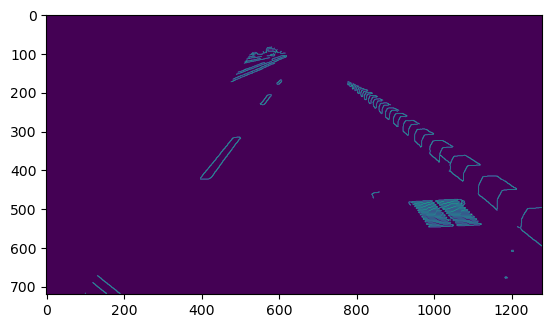

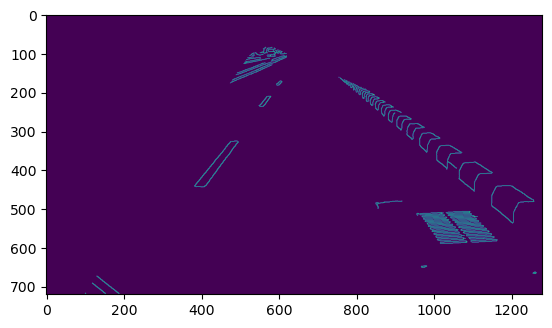

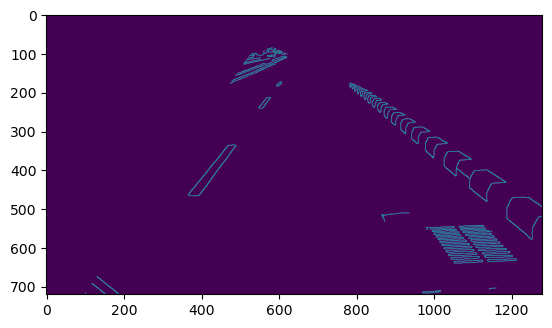

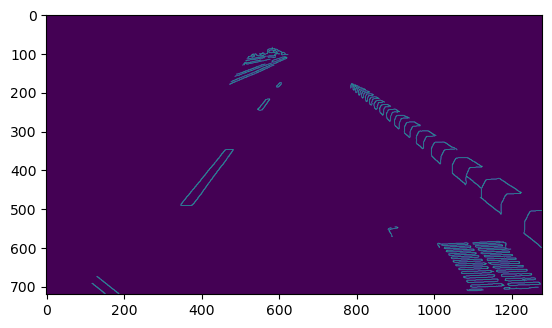

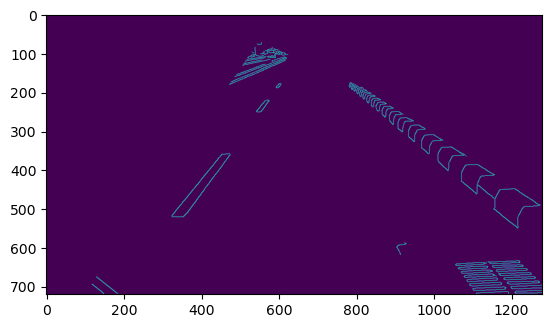

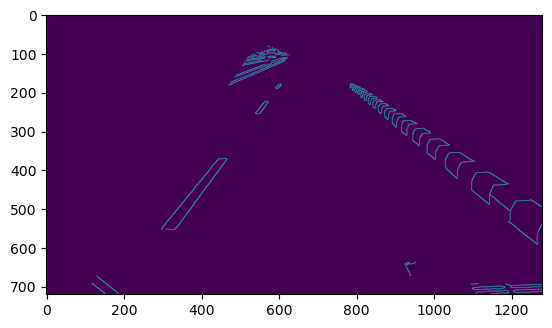

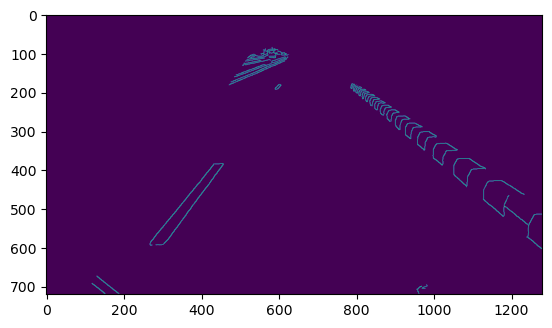

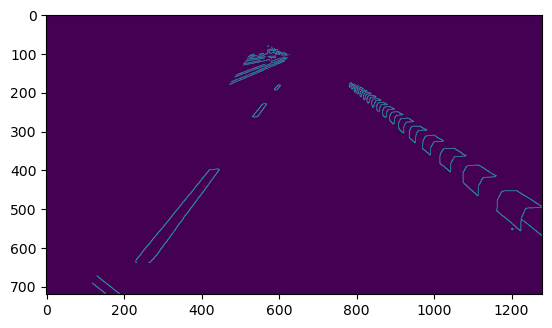

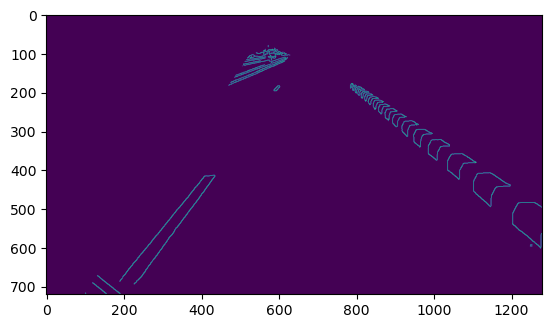

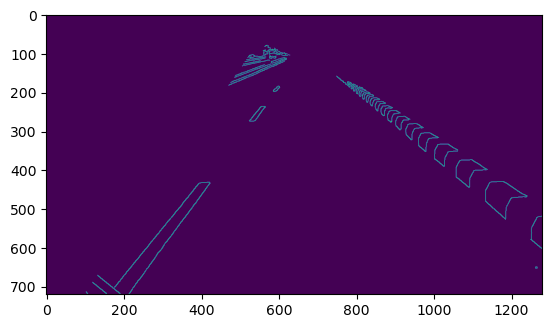

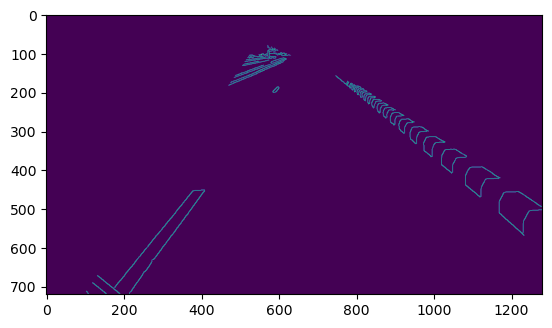

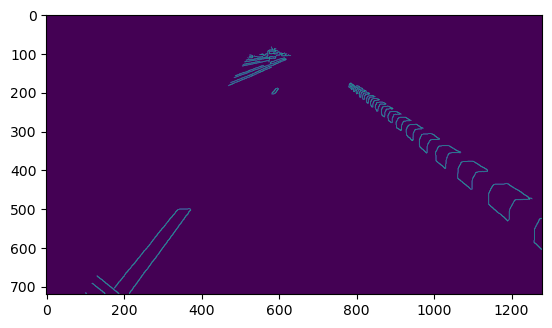

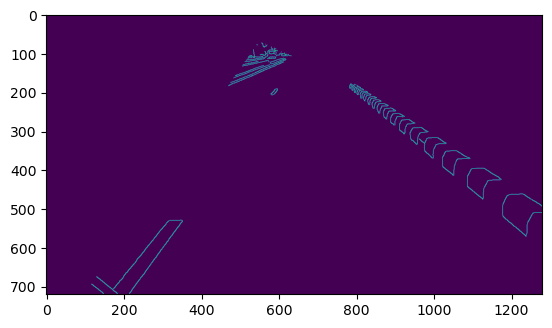

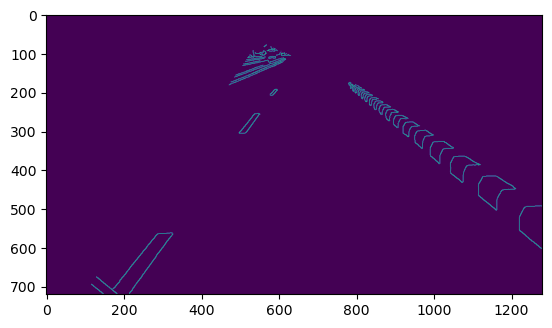

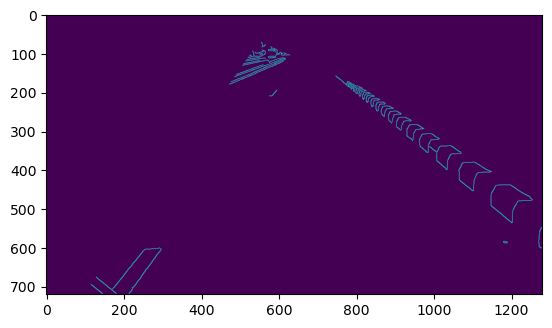

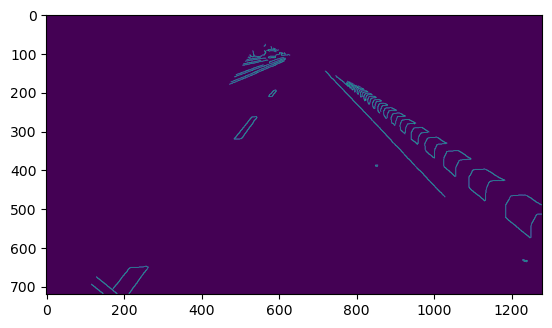

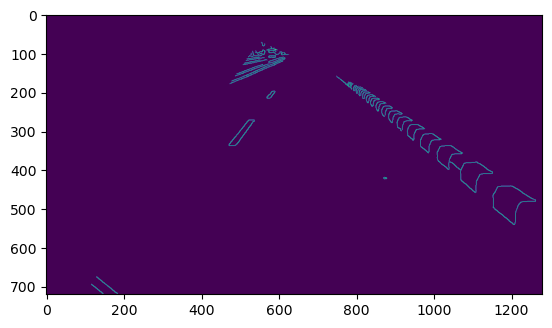

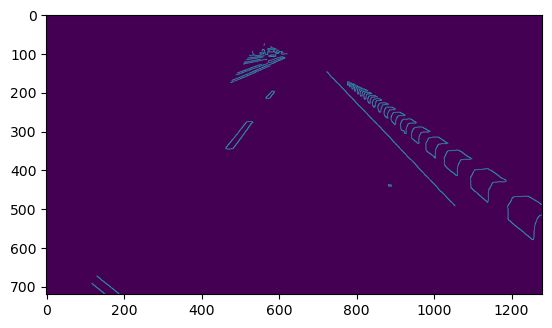

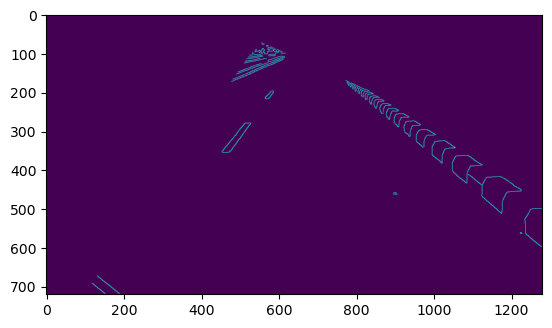

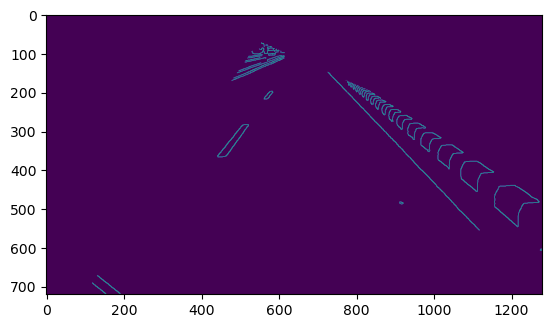

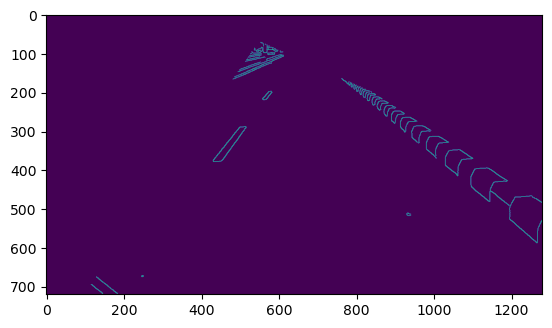

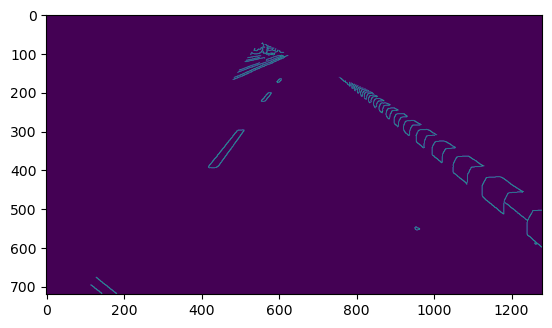

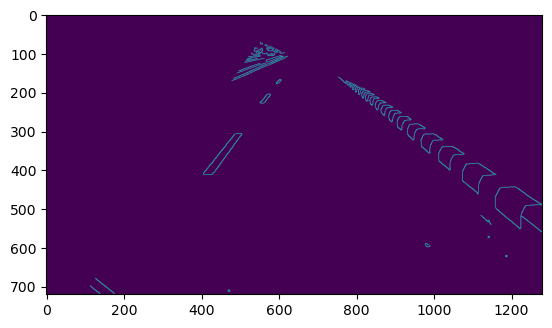

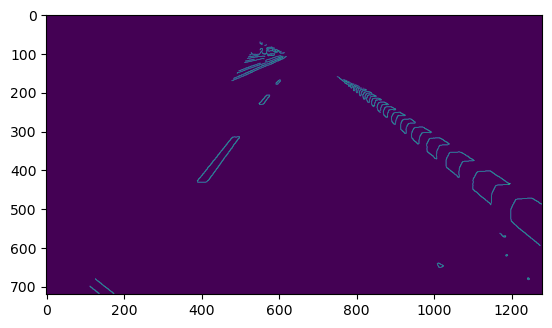

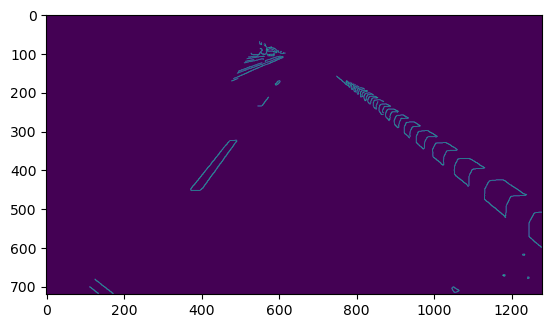

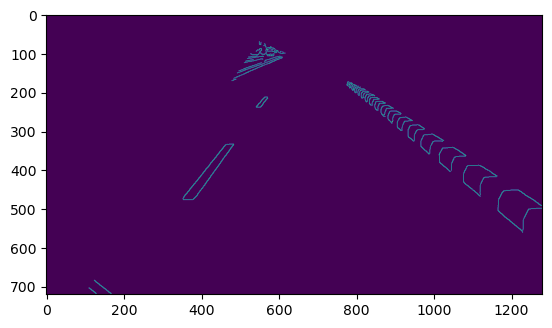

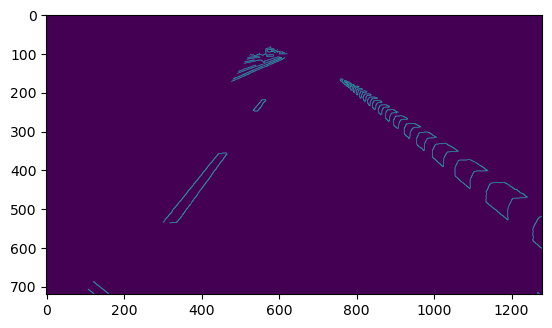

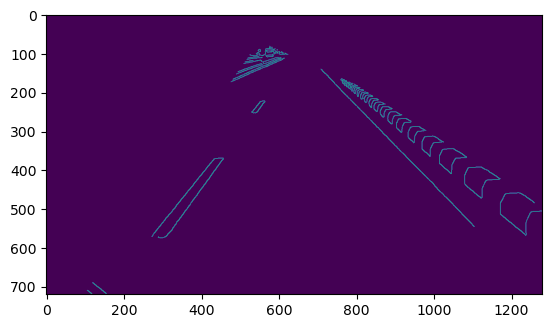

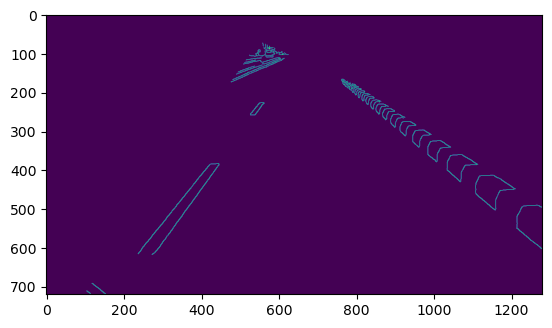

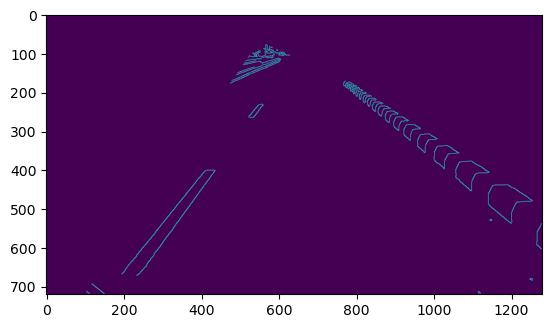

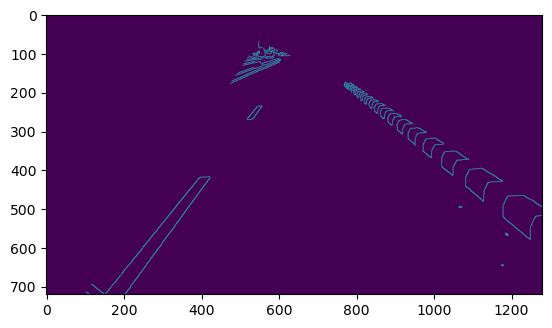

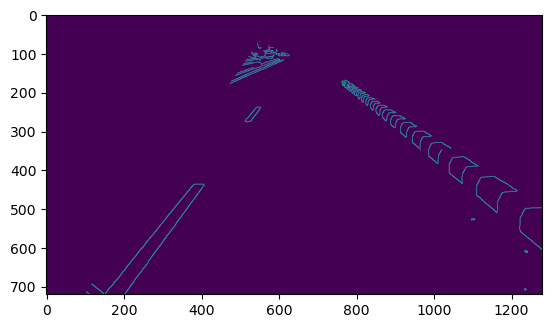

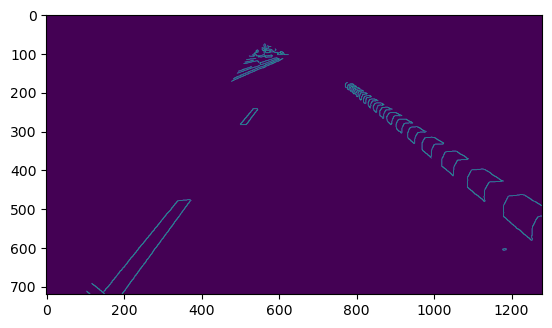

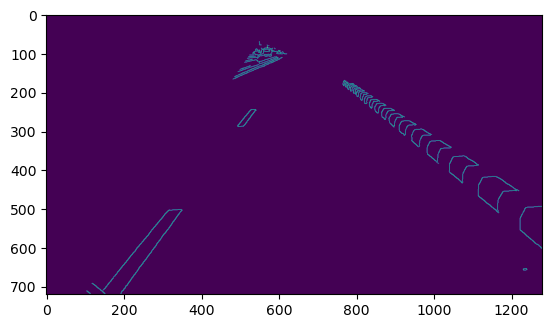

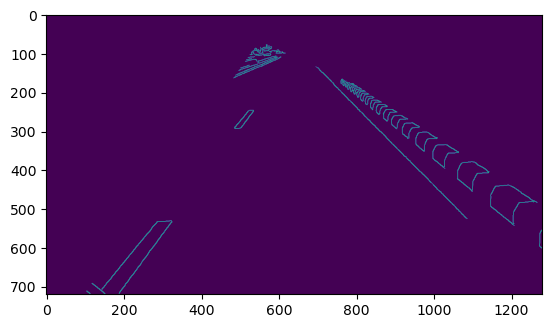

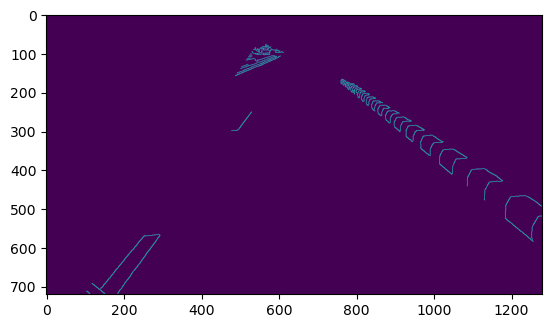

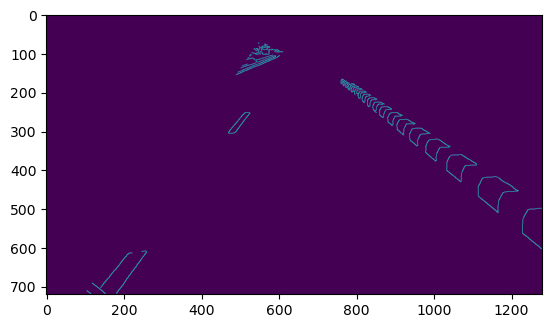

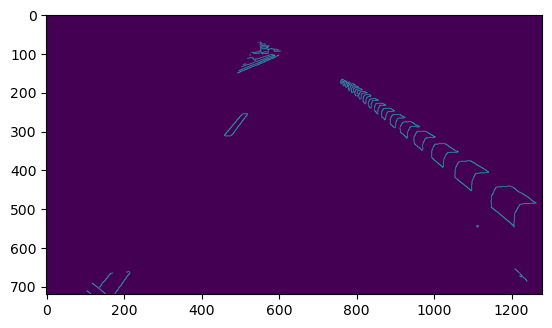

In [9]:
cap = cv2.VideoCapture(r"C:\Users\islam\Downloads\LaneDetectionVedio.mp4")

while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    canny_image = preprocess_image(frame)
    cropped_image = region_of_interest(canny_image)
    lines = detect_lines(cropped_image)
    result = display_lanes(frame, lines)

    cv2.imshow('Lane Detection', result)
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()